# 얕은 신경망(Shallow Neural Network)
매우 심플한 얕은 신경망을 설계한 후 임의의 숫자로 예측하기

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터 생성
임의의 데이터 생성

(10000, 2) (10000,)


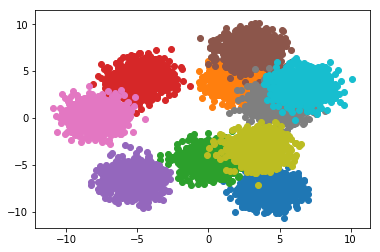

In [210]:
np.random.seed(10)

center_points = np.random.uniform(-8, 8, (10,2)) # 랜덤한 중앙값 10개 생성

inputs = []
labels = []
for i, cp in enumerate(center_points):
    for _ in range(1000):
        inputs.append(cp + np.random.randn(*cp.shape)) # 중앙값을 기준으로 임의의 점 100개 생성
        labels.append(i) # 각 레이블
        
inputs = np.stack(inputs, axis = 0)
labels = np.stack(labels, axis = 0)
print(inputs.shape, labels.shape)

# plot
plt.figure()
for i in range(10):
    mask = labels == i
    plt.scatter(inputs[mask, 0], inputs[mask, 1])

## 데이터셋 생성

In [211]:
from torch.utils.data import Dataset
import torchvision.transforms as transforms

In [212]:
class MyDataset(Dataset):
    
    def __init__(self, transform=None):
        self.inputs = inputs
        self.lables = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.inputs)
    
    def __getitem__(self, idx):
        input_data = inputs[idx]
        label_data = labels[idx]
        
        if self.transform:
            input_data = self.transform(input_data)
            
        return input_data, label_data
    

transform = transforms.Compose([transforms.ToTensor()])

mydataset = MyDataset()

dataloader = torch.utils.data.DataLoader(mydataset, batch_size=16, shuffle = True)
next(iter(dataloader))

[tensor([[ 6.7476,  2.5167],
         [ 6.6922,  3.0627],
         [-5.9371,  5.1286],
         [ 3.2378,  6.0905],
         [ 0.9422,  3.7219],
         [ 1.0210, -2.8355],
         [ 4.2645, -8.3322],
         [ 2.6996,  8.1020],
         [-6.3561, -6.8413],
         [-5.0849,  3.8243],
         [-4.9759,  3.7808],
         [-7.5914,  1.0875],
         [ 6.4875,  3.9307],
         [ 2.5224, -4.6912],
         [ 2.6945,  8.7733],
         [-5.1696,  3.0707]], dtype=torch.float64),
 tensor([9, 9, 3, 5, 1, 2, 0, 5, 4, 3, 3, 6, 9, 8, 5, 3], dtype=torch.int32)]

## Model 생성

In [213]:
import torch.nn as nn
import torch.nn.functional as F

In [214]:
class MyModel(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 10)
        
        
    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = self.fc2(out)
        
        return F.log_softmax(out, dim=1)
    
model = MyModel(2, 10)

## loss함수와 최적화

In [215]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

## 학습

In [216]:
EPOCH = 100
loss_list = []

model.train()
for e in range(EPOCH):
    losses = 0
    for i, data in enumerate(dataloader):
        input_, label_ = data
        
        optimizer.zero_grad()
        output_ = model(input_.float())
        loss = loss_func(output_.float(), label_.long())
        loss.backward()
        optimizer.step()
        
        losses += loss
        
    loss_list.append(losses/len(input_))
    
    print('EPOCH : [{}/{}] LOSS : {}'.format(e+1, EPOCH, losses))
        

EPOCH : [1/100] LOSS : 288.7618713378906
EPOCH : [2/100] LOSS : 139.5413360595703
EPOCH : [3/100] LOSS : 112.19017028808594
EPOCH : [4/100] LOSS : 103.91460418701172
EPOCH : [5/100] LOSS : 99.71634674072266
EPOCH : [6/100] LOSS : 96.42254638671875
EPOCH : [7/100] LOSS : 93.48419952392578
EPOCH : [8/100] LOSS : 92.83816528320312
EPOCH : [9/100] LOSS : 92.42862701416016
EPOCH : [10/100] LOSS : 91.25983428955078
EPOCH : [11/100] LOSS : 91.79927062988281
EPOCH : [12/100] LOSS : 91.1563720703125
EPOCH : [13/100] LOSS : 90.41301727294922
EPOCH : [14/100] LOSS : 90.98528289794922
EPOCH : [15/100] LOSS : 89.96204376220703
EPOCH : [16/100] LOSS : 89.7914047241211
EPOCH : [17/100] LOSS : 89.9959945678711
EPOCH : [18/100] LOSS : 89.38280487060547
EPOCH : [19/100] LOSS : 89.2765121459961
EPOCH : [20/100] LOSS : 89.29798889160156
EPOCH : [21/100] LOSS : 89.28173828125
EPOCH : [22/100] LOSS : 90.70471954345703
EPOCH : [23/100] LOSS : 89.50208282470703
EPOCH : [24/100] LOSS : 89.66610717773438
EPOCH 

## 정확도(Accuracy)

In [219]:
model.eval()
predict = model(torch.Tensor(inputs)).argmax(axis=1).numpy()

correct = predict == labels
accuracy = sum(correct) / len(labels) * 100

print('The Accuracy is : %.2f%%' %accuracy)

The Accuracy is : 94.18%


# Before & After

Text(0.5,1,'After')

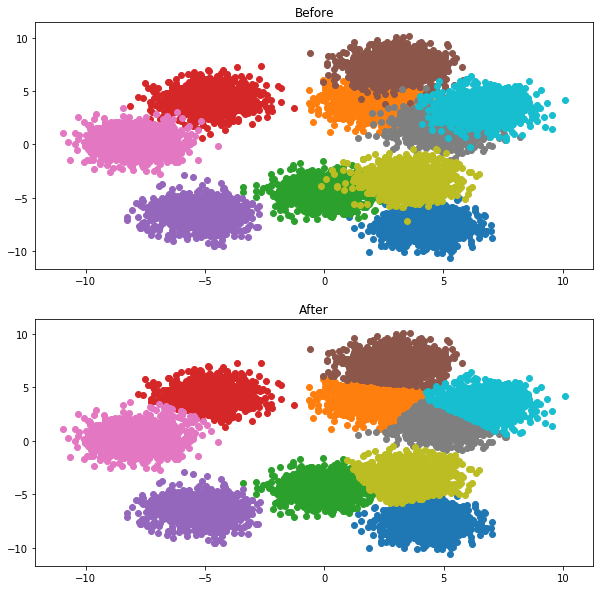

In [220]:
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
for i in range(10):
    mask = labels == i
    plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('Before')

plt.subplot(2,1,2)
for j in range(10):
    mask = predict == j
    plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('After')